# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import gymnasium as gym
from gymnasium.wrappers.time_limit import TimeLimit

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

Создание окружения

In [ ]:
#!pip install gymnasium[classic_control]

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


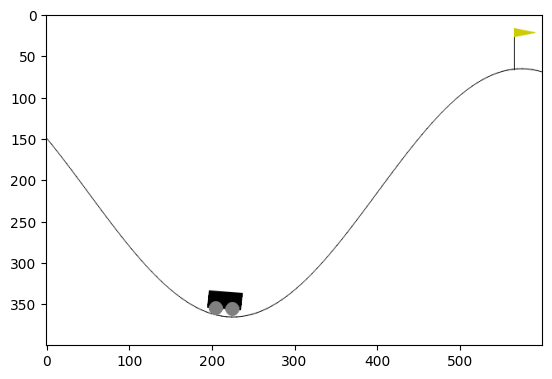

In [ ]:
# https://gymnasium.farama.org/environments/classic_control/
env_name = "MountainCar-v0"

env = gym.make(env_name, render_mode="rgb_array")
env.reset()

plt.imshow(env.render())  # type: ignore
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Взаимодействие с окружением

The three main methods of an environment are
* `reset()`: reset environment to the initial state, return first observation and info
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action `a` and return `(new_observation, reward, terminated, truncated, info)`
 * `new_observation`: an observation right after committing the action `a`
 * `reward`: a number representing your reward for committing action `a`
 * `terminated`: True if the MDP has just finished, False if still in progress
 * `truncated`: True if the number of steps elapsed >= max episode steps
 * `info`: some auxiliary stuff about what just happened. For now, ignore it.

In [ ]:
obs0, info = env.reset(seed=0)
print("initial observation code:", obs0)
# C сидом будет одно и то же (модель не обучится)
obs0, info = env.reset(seed=1)
print("initial observation code:", obs0)

initial observation code: [-0.47260767  0.        ]
initial observation code: [-0.49763566  0.        ]


In [ ]:
print("taking action 2 (right)")
new_obs, reward, is_done, _, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.4968302   0.00080547]
reward: -1.0
is game over?: False


In [ ]:
state, _ = env.reset()

is_done = False
while not is_done:
  action = 0
  state, reward, terminated, truncated, _ = env.step(action)

  is_done = terminated or truncated
  print(action, reward)

0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0
0 -1.0

Пример стратегии

In [ ]:
# Всегда двигаемся вправо
def policy(obs: tuple[float, float], time: int) -> int:
    position, velocity = obs
    return actions["right"]


# Create env manually to set time limit
TIME_LIMIT = 10
env = TimeLimit(
    gym.make(env_name, render_mode="rgb_array"),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {"left": 0, "stop": 1, "right": 2}

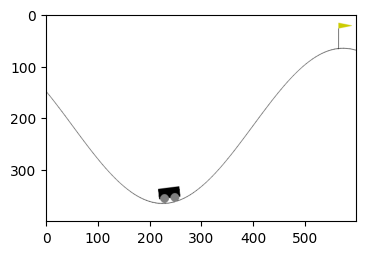

In [ ]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs, _ = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()

    action = policy(obs, t)  # Call your policy
    obs, reward, done, _, _ = env.step(action)  # Pass the action chosen by the policy to the environment

    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render())  # type: ignore

    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
from collections import defaultdict

Observation space: Tuple(Discrete(32), Discrete(11), Discrete(2))
Action space: Discrete(2)


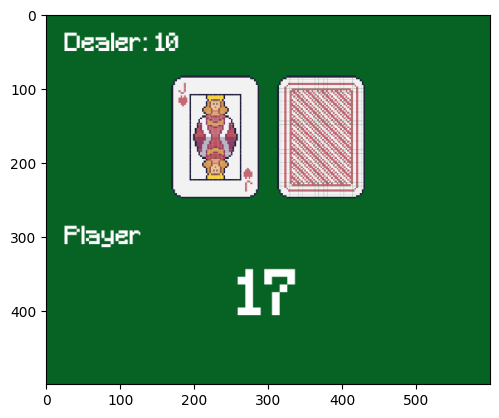

In [ ]:
env_name = "Blackjack-v1"

env = gym.make(env_name, render_mode="rgb_array")
env.reset()

plt.imshow(env.render())  # type: ignore
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [ ]:
class BlackjackAgentRandom:

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment

        return env.action_space.sample()

In [ ]:
from tqdm import tqdm

In [ ]:
env = "Blackjack-v1"

agent = BlackjackAgentRandom(
)

env = gym.make(env_name, natural=False, render_mode="rgb_array")
env.reset()

n_wins = 0
for episode in tqdm(range(10000)):
    obs, info = env.reset()
    done = False

    # play one episode
    #print("Start:")
    while not done:
        action = agent.get_action(obs)
        #print(obs, reward, action, terminated, truncated, sep = ' || ')
        next_obs, reward, terminated, truncated, _ = env.step(action)

        done = terminated or truncated
        obs = next_obs
    #print(obs, reward, action, sep = ' || ')
    if reward == 1:
      n_wins += 1

100%|██████████| 10000/10000 [00:02<00:00, 4613.79it/s]


In [ ]:
print(n_wins/10000)

0.2832


<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
"""Стратегия заключается в том, чтобы Stick'ать, если сумма игрока больше 17"""

"Стратегия заключается в том, чтобы Stick'ать, если сумма игрока больше 17"

In [ ]:
class BlackjackAgentChance:

    def get_action(self, obs: tuple[int, int, bool]) -> int:

        if obs[0] < 17:
          return 1
        else:
          return 0

In [ ]:
env = "Blackjack-v1"

agent = BlackjackAgentChance(
)

env = gym.make(env_name, natural=False, render_mode="rgb_array")
env.reset()

n_wins = 0
for episode in tqdm(range(10000)):
    obs, info = env.reset()
    done = False

    # play one episode
    #print("Start:")
    while not done:
        action = agent.get_action(obs)
        #print(obs, reward, action, terminated, truncated, sep = ' || ')
        next_obs, reward, terminated, truncated, _ = env.step(action)

        done = terminated or truncated
        obs = next_obs
    #print(obs, reward, action, sep = ' || ')
    if reward == 1:
      n_wins += 1

100%|██████████| 10000/10000 [00:04<00:00, 2065.33it/s]


In [ ]:
print(n_wins/10000)

0.4001


<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Стратегия поведения машины является частью окружения и должна быть реализована внутри него. Сделайте все соответствующие переменные и методы приватными (названия всех переменных начинаются с `__`), подчеркнув, что у пользователя не должно быть к ним доступа извне.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
from gymnasium import spaces
import logging

In [ ]:
LOG_FMT = logging.Formatter('%(levelname)s '
                            '[%(filename)s:%(lineno)d] %(message)s',
                            '%Y-%m-%d %H:%M:%S')

In [ ]:
CODE_MARK_MAP = {0: ' ', 1: 'O', 2: 'X'}
NUM = 9
O_REWARD = 1
X_REWARD = -1
NO_REWARD = 0

In [ ]:
LEFT_PAD = '  '

In [ ]:
action_space = spaces.MultiDiscrete(9)

In [ ]:
action_space.sample()

3

In [ ]:

def tomark(code):
    return CODE_MARK_MAP[code]


def tocode(mark):
    return 1 if mark == 'O' else 2


def next_mark(mark):
    return 'X' if mark == 'O' else 'O'


In [ ]:
def check_game_status(board):
    for t in [1, 2]:
        for j in range(0, 9, 3):
            if [t] * 3 == [board[i] for i in range(j, j+3)]:
                return t
        for j in range(0, 3):
            if board[j] == t and board[j+3] == t and board[j+6] == t:
                return t
        if board[0] == t and board[4] == t and board[8] == t:
            return t
        if board[2] == t and board[4] == t and board[6] == t:
            return t

    for i in range(9):
        if board[i] == 0:
            return -1


    return 0

In [ ]:
class TicTacToeEnv(gym.Env):

    def __init__(self, alpha=0.02, show_number=False):
        self.action_space = spaces.MultiDiscrete(NUM)
        self.observation_space = spaces.Dict(
            {
                '0': spaces.Box(low=0, high=1, shape=(1,), dtype=np.int32),
                '1': spaces.Box(low=0, high=1, shape=(1,), dtype=np.int32),
                '2': spaces.Box(low=0, high=1, shape=(1,), dtype=np.int32),
            }
        )
        self.alpha = alpha
        self.set_start_mark('O')
        self.show_number = show_number
        self.reset()

    def set_start_mark(self, mark):
        self.start_mark = mark

    def reset(self):
        self.board = [0] * NUM
        self.mark = self.start_mark
        self.done = False
        self.done_actions = [1, 2, 3, 4, 5, 6, 7, 8, 9]
        self.bad_render = False
        return self._get_obs()

    def step(self, action):
        #assert
        #assert self.action_space.contains(action)
        if self.done_actions[action] == 0:
          self.bad_render = True
          return self._get_obs(), 0, False, None
        else:
          self.bad_render = False
          self.done_actions[action] = 0
        loc = action
        if self.done:
            return self._get_obs(), 0, True, None

        reward = NO_REWARD
        self.board[loc] = tocode(self.mark)
        status = check_game_status(self.board)
        logging.debug("check_game_status board {} mark '{}'"
                      " status {}".format(self.board, self.mark, status))
        if status >= 0:
            self.done = True
            if status in [1, 2]:
                reward = O_REWARD if self.mark == 'O' else X_REWARD


        self.mark = next_mark(self.mark)
        return self._get_obs(), reward, self.done, None

    def _get_obs(self):
        return tuple(self.board), self.mark#, self.done_actions

    def render(self, mode='human', close=False):
        close = self.bad_render
        if close:
            return
        if mode == 'human':
            self._show_board(print)
            print('')
        else:
            self._show_board(logging.info)
            logging.info('')

    def _show_board(self, showfn):
        for j in range(0, 9, 3):
            def mark(i):
                return tomark(self.board[i]) if not self.show_number or\
                    self.board[i] != 0 else str(i+1)
            showfn(LEFT_PAD + '|'.join([mark(i) for i in range(j, j+3)]))
            if j < 6:
                showfn(LEFT_PAD + '-----')

In [ ]:
game = TicTacToeEnv()

In [ ]:
import logging

In [ ]:
game.reset()

((0, 0, 0, 0, 0, 0, 0, 0, 0), 'O')

In [ ]:
done = False
while not done:
    action = game.action_space.sample()
    observation, reward, done, info = game.step(action)
    game.render()
    print('Next step!', reward)

   | | 
  -----
   | | 
  -----
  O| | 

Next step! 0
  X| | 
  -----
   | | 
  -----
  O| | 

Next step! 0
  X|O| 
  -----
   | | 
  -----
  O| | 

Next step! 0
  X|O| 
  -----
   |X| 
  -----
  O| | 

Next step! 0
  X|O| 
  -----
   |X| 
  -----
  O| |O

Next step! 0
Next step! 0
  X|O|X
  -----
   |X| 
  -----
  O| |O

Next step! 0
Next step! 0
Next step! 0
  X|O|X
  -----
   |X|O
  -----
  O| |O

Next step! 0
Next step! 0
Next step! 0
Next step! 0
Next step! 0
  X|O|X
  -----
  X|X|O
  -----
  O| |O

Next step! 0
Next step! 0
Next step! 0
Next step! 0
  X|O|X
  -----
  X|X|O
  -----
  O|O|O

Next step! 1


In [ ]:
game.reset()

((0, 0, 0, 0, 0, 0, 0, 0, 0), 'O')

In [ ]:
n_wins = 0
for episode in tqdm(range(1000)):
    obs = game.reset()
    done = False
    while not done:
        action = game.action_space.sample()
        next_obs, reward, done, info = game.step(action)
        #game.render()
    if reward == 1:
      n_wins += 1

100%|██████████| 1000/1000 [00:00<00:00, 4053.28it/s]


In [ ]:
print(n_wins/1000)

0.581


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
#Стратегрия проста - первый нолик ставим в серединке
type(game.action_space.sample())

numpy.int64

In [ ]:
class TicTacToeStategy:

    def get_action(self, obs) -> int:

        if obs[0][4] == 0:
          return 4
        else:
          return game.action_space.sample()


In [ ]:
game.reset()

((0, 0, 0, 0, 0, 0, 0, 0, 0), 'O')

In [ ]:
#Стратегия в коде
n_wins = 0
for episode in tqdm(range(1000)):
    obs = game.reset()
    done = False
    while not done:
        if obs[0][4] == 0:
          action = 4
        else:
          action = game.action_space.sample()
        next_obs, reward, done, info = game.step(action)
        obs = next_obs
    if reward == 1:
      n_wins += 1

100%|██████████| 1000/1000 [00:00<00:00, 5298.96it/s]


In [ ]:
print(n_wins/1000)

0.698


In [ ]:
#Стратегия в классе
n_wins = 0
agent = TicTacToeStategy
for episode in tqdm(range(1000)):
    obs= game.reset()
    done = False
    #print(obs, info)
    while not done:
        action = agent.get_action(_, obs)
        next_obs, reward, done, info = game.step(action)
        obs = next_obs
        #game.render()
    if reward == 1:
      n_wins += 1

100%|██████████| 1000/1000 [00:00<00:00, 4718.32it/s]


In [ ]:
print(n_wins/1000)

0.683


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


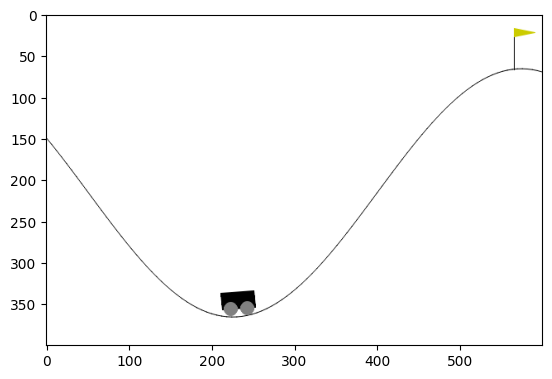

In [ ]:
env_name = "MountainCar-v0"

env = gym.make(env_name, render_mode="rgb_array")
env.reset()

plt.imshow(env.render())  # type: ignore
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

In [ ]:
env = gym.wrappers.RecordVideo(env, 'video', episode_trigger = lambda x: x % 5 == 0)

In [ ]:
for episode in tqdm(range(10)):
    env.reset()
    is_done = False
    #print(obs, info)
    while not is_done:
        action = env.action_space.sample()
        state, reward, terminated, truncated, _ = env.step(action)
        is_done = terminated or truncated

  0%|          | 0/10 [00:00<?, ?it/s]

Moviepy - Building video /content/video/rl-video-episode-5.mp4.
Moviepy - Writing video /content/video/rl-video-episode-5.mp4




 40%|████      | 4/10 [00:03<00:05,  1.14it/s]

Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-5.mp4


 40%|████      | 4/10 [00:04<00:05,  1.14it/s]

Moviepy - Building video /content/video/rl-video-episode-10.mp4.
Moviepy - Writing video /content/video/rl-video-episode-10.mp4




100%|██████████| 10/10 [00:06<00:00,  1.61it/s]

Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-10.mp4


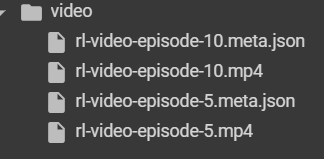

## Обратная связь
- [ ] Хочу получить обратную связь по решению

In [ ]:
phrase = "Моя прелесть"

In [ ]:
for i in range(len(phrase)-1, -1, -1):
  print(phrase[i], end="")

ьтселерп яоМ